<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_51_Gradient_Descent_From_Scratch_%26_Animation/Lecture_51_gradient_Descent_class_for_both_m%26b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#importing libraries
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [42]:
# Generate synthetic regression data

x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1, noise=13)

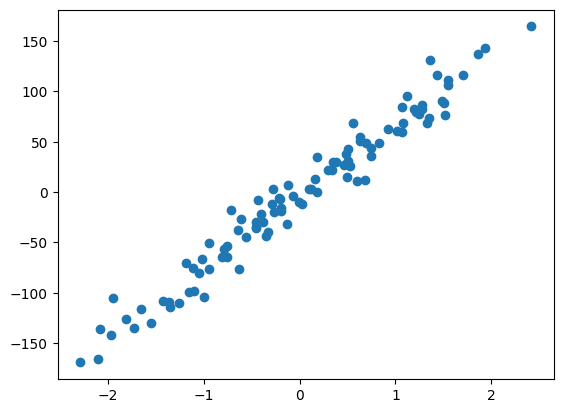

In [43]:
# Plot the generated data

plt.scatter(x,y)

In [44]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [45]:
# Import the Linear Regression model from scikit-learn

from sklearn.linear_model import LinearRegression

In [46]:
# Create an instance of the Linear Regression model

lr = LinearRegression()

In [47]:
# Fit the Linear Regression model to the training data

lr.fit(x_train,y_train)

# Print the learned coefficients and intercept
print(lr.coef_)
print(lr.intercept_)

[69.76940943]
-3.103468462252244


In [48]:
# Make predictions on the test data using the scikit-learn model

y_pred = lr.predict(x_test)

# Calculate the R-squared score for the scikit-learn model's predictions
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9630041478324802

In [49]:
# Define a custom Gradient Descent Regressor class

class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,x,y):
    # calculate the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m*x.ravel() -self.b)
      loss_slope_m = -2 * np.sum((y - self.m*x.ravel() -self.b)*x.ravel())
      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
      # print(loss_slope,self.b)
    print(self.m,self.b)
  def predict(self,x):
    return self.m*x + self.b

In [50]:
# Create an instance of the custom GDRegressor

gd = GDRegressor(0.001,50)

In [51]:
# Train the custom GDRegressor on the training data

gd.fit(x_train,y_train)

69.76615317847165 -3.122408894800932


In [52]:
# Make predictions on the test data using the custom GDRegressor

y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9630029159825577